# MAP

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

%matplotlib inline

## Berlin

In [2]:
berlin_bezirksgrenzen_df = gpd.read_file('data/bezirksgrenzen.geojson')
berlin_bezirksgrenzen_df = berlin_bezirksgrenzen_df[['Gemeinde_name', 'geometry']]
berlin_bezirksgrenzen_df.rename(columns={'Gemeinde_name' : 'district'}, inplace=True)
berlin_bezirksgrenzen_df.iloc[2,0] = 'Treptow-Koepenick'
berlin_bezirksgrenzen_df.iloc[4,0] = 'Neukoelln'
berlin_bezirksgrenzen_df.iloc[5,0] = 'Lichtenberg-Hohenschoenhausen'
berlin_bezirksgrenzen_df.iloc[11,0] = 'Tempelhof-Schoeneberg'
berlin_bezirksgrenzen_df

,district,geometry
0,Reinickendorf,"MULTIPOLYGON (((13.32074 52.62660, 13.32045 52..."
1,Charlottenburg-Wilmersdorf,"MULTIPOLYGON (((13.32111 52.52446, 13.32103 52..."
2,Treptow-Koepenick,"MULTIPOLYGON (((13.57925 52.39083, 13.57958 52..."
3,Pankow,"MULTIPOLYGON (((13.50481 52.61960, 13.50467 52..."
4,Neukoelln,"MULTIPOLYGON (((13.45832 52.48569, 13.45823 52..."
5,Lichtenberg-Hohenschoenhausen,"MULTIPOLYGON (((13.52316 52.47424, 13.52367 52..."
6,Marzahn-Hellersdorf,"MULTIPOLYGON (((13.61317 52.47213, 13.61329 52..."
7,Spandau,"MULTIPOLYGON (((13.23119 52.56124, 13.23092 52..."
8,Steglitz-Zehlendorf,"MULTIPOLYGON (((13.31952 52.46699, 13.31910 52..."
9,Mitte,"MULTIPOLYGON (((13.37721 52.56091, 13.37715 52..."


<AxesSubplot:>

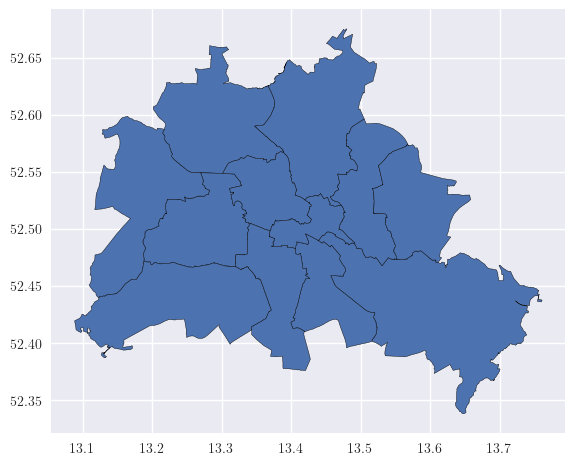

In [3]:
fig, ax = plt.subplots()

berlin_bezirksgrenzen_df.plot(
    ax=ax, 
    #column='district',
    categorical=True, 
    legend=True, 
    legend_kwds={'title': 'Neighbourhood', 'loc': 'upper right'},
    #cmap='viridis', 
    edgecolor='black'
)

## Housing Data

In [4]:
data = pd.read_csv('/Users/junyuchen/Desktop/Master Thesis/code/data/gaa.csv', parse_dates=['vertrag'], index_col=['vertrag'], low_memory=False)
data.index = data.index.to_period('Q').rename('period')
data = data.loc[data["alter"] > 0]
data = data.loc[data['kalender'] != '2017q2', :]
print(f'\nNumber of observations after dropping "2017q2": {len(data)}.')
data = data[['kalender', 'flaeche', 'gflaeche', 'alter', 'preis', 'stellung', 'bezirk']]
data.rename(
    columns = {
        'kalender' : 'period_string',
        'flaeche' : 'lot_size',
        'gflaeche' : 'floor_space',
        'alter' : 'age',
        'preis' : 'price',
        'stellung' : 'type',
        'bezirk' : 'district'
    }, inplace=True)

# select the first N observations of each quarter
def select_observations(group):
    return group.sample(n=N, random_state=999)

N = data.index.value_counts().sort_values()[0]
data = data.groupby(data.index).apply(select_observations).reset_index(level=0, drop=True)
print(f"\nThe total number of observations after dropping missing observations: {len(data)}.")

data


Number of observations after dropping "2017q2": 29900.

The total number of observations after dropping missing observations: 16320.


,period_string,lot_size,floor_space,age,price,type,district
period,,,,,,,
1996Q1,1996q1,912,80,58,283767,Freistehend/Einzelhaus,Marzahn-Hellersdorf
1996Q1,1996q1,767,162,85,255646,Freistehend/Einzelhaus,Reinickendorf
1996Q1,1996q1,540,141,59,247977,Freistehend/Einzelhaus,Spandau
1996Q1,1996q1,279,141,18,311888,Reihenendhaus,Reinickendorf
1996Q1,1996q1,401,170,76,183298,Freistehend/Einzelhaus,Marzahn-Hellersdorf
...,...,...,...,...,...,...,...
2017Q1,2017q1,481,122,44,288000,Doppelhaushaelfte,Reinickendorf
2017Q1,2017q1,559,79,16,397000,Freistehend/Einzelhaus,Pankow
2017Q1,2017q1,595,67,82,235000,Doppelhaushaelfte,Reinickendorf


In [5]:
#pd.DataFrame({'district': })
df_count = pd.DataFrame(data['district'].value_counts().sort_values())
df_count.reset_index(inplace=True)
df_count.rename(columns = {'index' : 'district', 'district' : 'count'}, inplace=True)
df_count
#data.groupby('period_string', as_index=False)['price'].mean()

,district,count
0,Friedrichshain-Kreuzberg,3
1,Mitte,47
2,Charlottenburg-Wilmersdorf,522
3,Lichtenberg-Hohenschoenhausen,644
4,Pankow,1081
5,Marzahn-Hellersdorf,1433
6,Treptow-Koepenick,1498
7,Spandau,1777
8,Tempelhof-Schoeneberg,1861
9,Neukoelln,2122


In [6]:
geo_data = berlin_bezirksgrenzen_df.merge(df_count, on='district', how='left')
print(type(geo_data))
geo_data['id'] = np.arange(1,13)

geo_data['coords'] = geo_data['geometry'].apply(lambda x: x.representative_point().coords[:])
geo_data['coords'] = [coords[0] for coords in geo_data['coords']]
geo_data

<class 'geopandas.geodataframe.GeoDataFrame'>


,district,geometry,count,id,coords
0,Reinickendorf,"MULTIPOLYGON (((13.32074 52.62660, 13.32045 52...",2754,1,"(13.288141858855083, 52.60484489017112)"
1,Charlottenburg-Wilmersdorf,"MULTIPOLYGON (((13.32111 52.52446, 13.32103 52...",522,2,"(13.272750785323504, 52.50796263682948)"
2,Treptow-Koepenick,"MULTIPOLYGON (((13.57925 52.39083, 13.57958 52...",1498,3,"(13.626334522436734, 52.41789752621652)"
3,Pankow,"MULTIPOLYGON (((13.50481 52.61960, 13.50467 52...",1081,4,"(13.436379168976583, 52.59765827133238)"
4,Neukoelln,"MULTIPOLYGON (((13.45832 52.48569, 13.45823 52...",2122,5,"(13.443075490568862, 52.44589580355115)"
5,Lichtenberg-Hohenschoenhausen,"MULTIPOLYGON (((13.52316 52.47424, 13.52367 52...",644,6,"(13.49092055987913, 52.532284269868995)"
6,Marzahn-Hellersdorf,"MULTIPOLYGON (((13.61317 52.47213, 13.61329 52...",1433,7,"(13.585397413903896, 52.52247428610016)"
7,Spandau,"MULTIPOLYGON (((13.23119 52.56124, 13.23092 52...",1777,8,"(13.181870353892062, 52.519205700925504)"
8,Steglitz-Zehlendorf,"MULTIPOLYGON (((13.31952 52.46699, 13.31910 52...",2578,9,"(13.242071459897895, 52.42945022164251)"
9,Mitte,"MULTIPOLYGON (((13.37721 52.56091, 13.37715 52...",47,10,"(13.359798059506346, 52.53323007057742)"


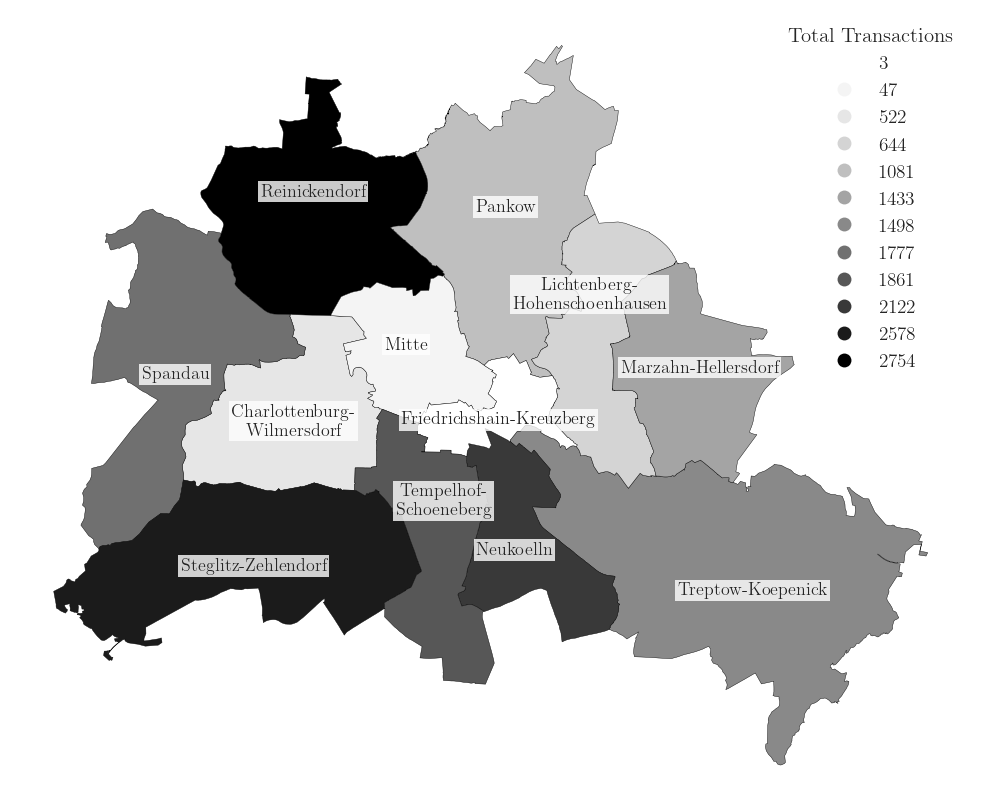

In [25]:
fig, ax = plt.subplots(figsize=(12,8), layout="constrained")

geo_data.plot(
    ax=ax, 
    column='count',
    categorical=True, 
    legend=True, 
    legend_kwds={'title': 'Total Transactions', 'loc': 'upper right'},
    cmap='Greys', 
    edgecolor='black'
)
plt.rcParams['legend.title_fontsize'] = '15'
plt.rcParams['legend.fontsize'] = '15'


for idx, row in geo_data.iterrows():
    # Charlottenburg-Wilmersdorf
    if idx==1:
        ax.text(row.coords[0], row.coords[1]-0.015, s='Charlottenburg-\nWilmersdorf', horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'}, fontsize=13)
    # Neukoelln
    elif idx==4:
        ax.text(row.coords[0], row.coords[1]-0.009, s=row['district'], horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'}, fontsize=13)
    # Lichtenberg-Hohenschoenhausen
    elif idx==5:
        ax.text(row.coords[0]+0.01, row.coords[1]+0.02, s='Lichtenberg-\nHohenschoenhausen', horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'}, fontsize=13)
    # Friedrichshain-Kreuzberg
    elif idx==10:
        ax.text(row.coords[0]-0.02, row.coords[1]-0.009, s=row['district'], horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'}, fontsize=13)
    # Tempelhof-Schoeneberg
    elif idx==11:
        ax.text(row.coords[0], row.coords[1]+0.015, s='Tempelhof-\nSchoeneberg', horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'}, fontsize=13)
    else:
        ax.text(row.coords[0], row.coords[1], s=row['district'], horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'}, fontsize=13)


# colorbar
bar_info = plt.cm.ScalarMappable(cmap="Greys", norm=plt.Normalize(vmin=0, vmax=3000))
#plt.colorbar(bar_info, fraction=0.02, pad=0, cax=ax.inset_axes([1, 0.1, 0.02, 0.8]))
ax.axis('off')
plt.savefig('Plots/Berlin_map.png', dpi=600)
plt.show()